In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Computational Essay
By Roy Lim z5310629

## Intro & Background

## Results

In [2]:
# Constants
hbar = 1.055e-34      # Js
q = 1.602e-19         # C
m = 9.1e-31           # kg

In [3]:
# x1, x2, x are in nm
# Output for VQD and VDQD are in eV
def VQD(alpha, x1, x):
    return alpha * (x - x1) ** 2

def VDQD(alpha, x1, x2, x):
    return min(alpha * (x - x1) ** 2, alpha * (x - x2) ** 2)

def VF(F, x):
    return F * x

def VFT(F, x, omega, t):
    return F * x * np.cos(omega * t)

### Part A
We can solve the Hamiltonian:
$$
    H = 
    \begin{bmatrix}
    E & t \\
    t* & -E \\ 
    \end{bmatrix}
$$
to get the following eigenvalues: $\lambda_1 = -\sqrt{t^2 + E^2} $, $\lambda_2 = \sqrt{t^2 + E^2}$ and given eigenvectors:
$$
    | \lambda_2 \rangle = 
    \begin{bmatrix}
        E - \sqrt{t^2 + E^2} \\ 
        t
    \end{bmatrix}
    | \lambda_2 \rangle = 
    \begin{bmatrix}
       E + \sqrt{t^2 + E^2} \\ 
       t 
    \end{bmatrix}
$$
Therefore $E_2 - E_1 = 2\sqrt{t^2 + E^2}$, min value for $E_2 - E_1$ is $2t$

For an energy state $| \lambda \rangle = \begin{bmatrix} a \\ b\end{bmatrix}$, the probability of being in state $|0\rangle$ and $|1\rangle$ is $|a|^2$ and $|b|^2$ respectively.
Note that $|a|^2 + |b|^2 = 1$ and that $t$ is real (meaning $t* = t$)

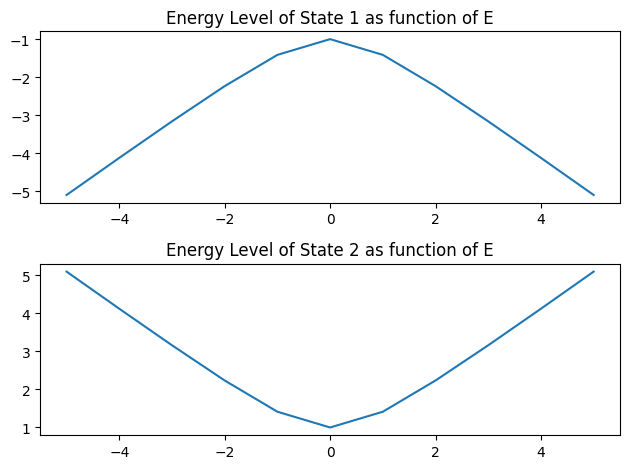

In [4]:
t = 1
E = [e for e in range(-5, 6)]
fig, axes = plt.subplots(2)
state1 = axes[0]
state2 = axes[1]
state1.plot([e for e in E], [-np.sqrt(t ** 2 + e ** 2)for e in E])
state1.set_title('Energy Level of State 1 as function of E')
state2.plot([e for e in E], [np.sqrt(t ** 2 + e ** 2)for e in E])
state2.set_title('Energy Level of State 2 as function of E')
plt.tight_layout()

In [5]:
# a = E, b = t
probability_matrix = [
    [
        lambda a, b: (a + np.sqrt(a ** 2 + b ** 2)) ** 2 / ((a + np.sqrt(a ** 2 + b ** 2)) ** 2 + b ** 2),
        lambda a, b:  b ** 2 / ((a + np.sqrt(a ** 2 + b ** 2)) ** 2 + b ** 2),
    ],
    [
        lambda a, b: (a - np.sqrt(a ** 2 + b ** 2)) ** 2 / ((a - np.sqrt(a ** 2 + b ** 2)) ** 2 + b ** 2),
        lambda a, b:  b ** 2 / ((a - np.sqrt(a ** 2 + b ** 2)) ** 2 + b ** 2),
    ]
]

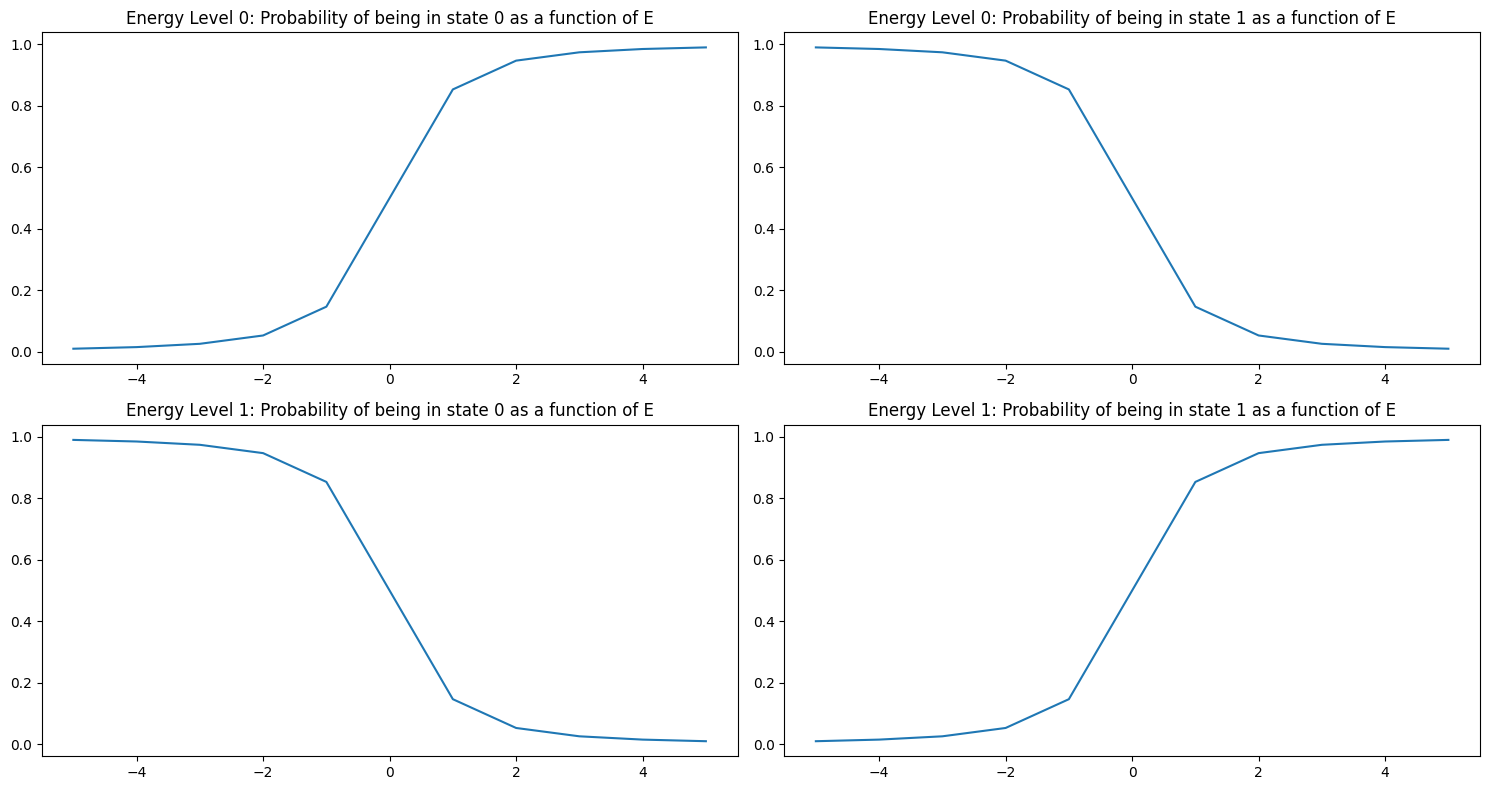

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
for energy_level in [0, 1]:
    for state in [0, 1]:
        ax = axes[energy_level, state]
        ax.plot([e for e in E], [probability_matrix[energy_level][state](e, t) for e in E], '-')
        ax.set_title(f'Energy Level {energy_level}: Probability of being in state {state} as a function of E')
        
plt.tight_layout()

### Part B

In [7]:
def get_eigenvalue_and_eigenvectors(alpha):
    # Create Hamiltonian
    Np = 100
    a = 1e-10  # m
    X = a * np.linspace(1, Np, Np) / 1e-9 # nm
    # divide by q to convert to eV, accounting for mass of quantum dot ~ 0.2 mass of electron
    t0 = (hbar * hbar) / (2 * 0.2 * m * a * a) / q
    on = 2.0 * t0 * np.ones(Np)
    off = -t0 * np.ones(Np - 1)

    x1 = 5 # nm
    U = np.array([VQD(alpha, x1, x) for x in X])
    H = np.diag(on + U) + np.diag(off, 1) + np.diag(off, -1)
    W, V = np.linalg.eig(H)
    idx = W.argsort()[::1]
    W = W[idx]
    V = V[:, idx]

    return W, V, X, U

[0.05537888245538459, 0.05537888245538459, 0.05537888245538459, 0.05537888245538459, 0.05537888245538459, 0.05537888245538459, 0.05537888245538459, 0.05537888245538459, 0.05537888245538459, 0.05537888245538459, 0.05537888245538459, 0.05537888245538459, 0.05537888245538459, 0.05537888245538459, 0.05537888245538459, 0.05537888245538459, 0.05537888245538459, 0.05537888245538459, 0.05537888245538459, 0.05537888245536206, 0.05537888245533565, 0.055378882455730624, 0.05537888245927673, 0.05537888249412955]


Text(0, 0.5, 'Energy Gap (eV)')

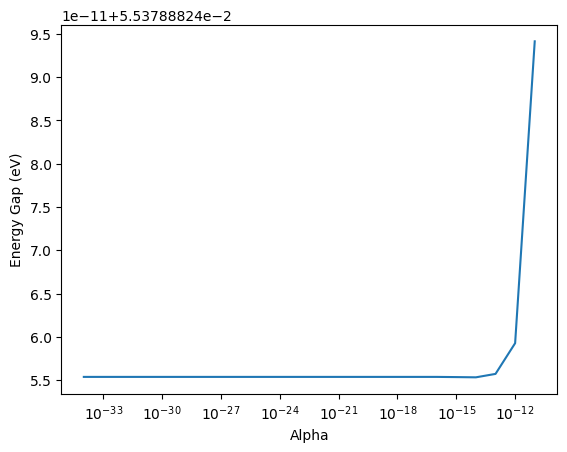

In [8]:
alpha, energy_gap = [], []
for n in range(-34, -10):
    alpha.append(10 ** n)
    W, _, _, _ = get_eigenvalue_and_eigenvectors(10 ** n)
    energy_gap.append(W[1] - W[0])
plt.plot(alpha, energy_gap)
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Alpha')
plt.ylabel('Energy Gap (eV)')

In [9]:
W, V, X, U = get_eigenvalue_and_eigenvectors(0)

In [10]:
eigenvalue_0, eigenvalue_1 = W[0:2]
Psi0 = np.multiply(V[:, 0], V[:, 0])
Psi1 = np.multiply(V[:, 1], V[:, 1])

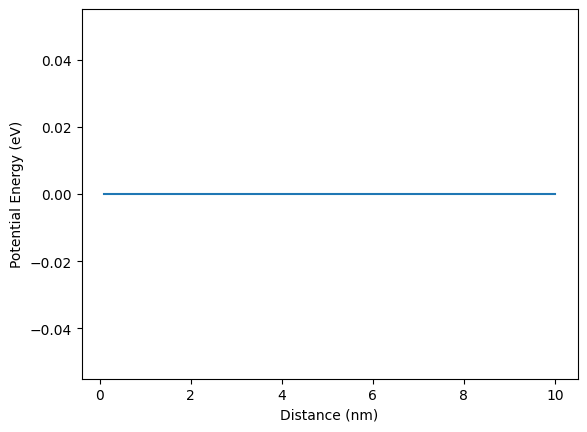

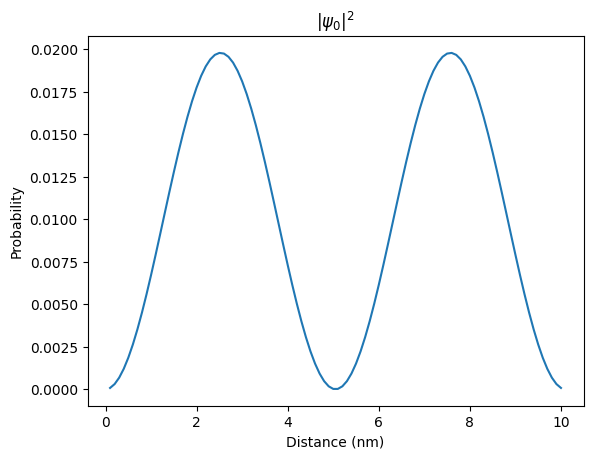

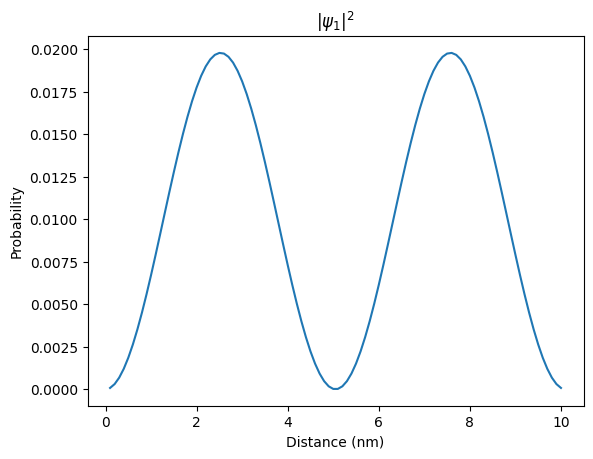

In [11]:
plt.figure(1)
plt.plot(X, U)
plt.xlabel('Distance (nm)')
plt.ylabel('Potential Energy (eV)')
plt.show()

plt.figure(2)
plt.plot(X, Psi1)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title(r'$|\psi_0|^2$')
plt.show()

plt.figure(3)
plt.plot(X, Psi1)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title(r'$|\psi_1|^2$')
plt.show()

In [12]:
bohr_radii = 5.29e-11 # m

i) 
Alpha is related to the potential energy of the gate. 
This means we can adjust it with parameters such as temperature and voltage applied.
In addition, adjusting the thickness of the layers of SiO2 and Si may also affect alpha.
Temperature range we expect for the device to work would be low (close to 0K), otherwise the thermal fluctuation may cause decoherence. 
ii)
???
iii)
Quantum dots are called artificial atoms as they have discrete energy levels similar to how electrons do in an atom.
The length scale of the work function chosen is the distance between the two major peaks in the probability density function. 

### Part C

In [13]:
## Create Hamiltonian
Np = 100
a = 1e-10  # m
X = a * np.linspace(1, Np, Np) / 1e-9 # nm
# divide by q to convert to eV, accounting for mass of quantum dot ~ 0.2 mass of electron
t0 = (hbar * hbar) / (2 * 0.2 * m * a * a) / q
on = 2.0 * t0 * np.ones(Np)
off = -t0 * np.ones(Np - 1)

x1 = 2.5
x2 = 7.5
alpha = 1e-5
U = np.array([VDQD(alpha, x1, x2, x) for x in X])
H = np.diag(on + U) + np.diag(off, 1) + np.diag(off, -1)

In [14]:
# solve for eigenvalues and eigenvector
W, V = np.linalg.eig(H)
idx = W.argsort()[::1]
W = W[idx]
V = V[:, idx]

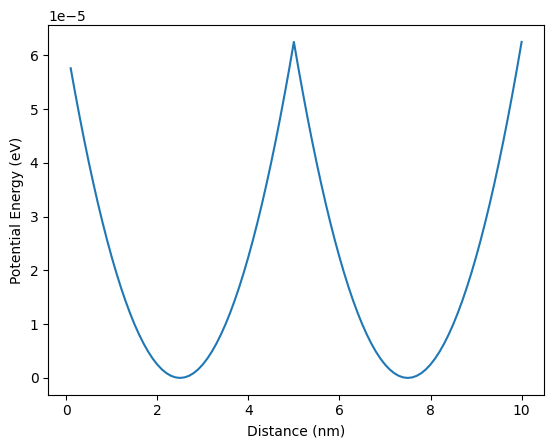

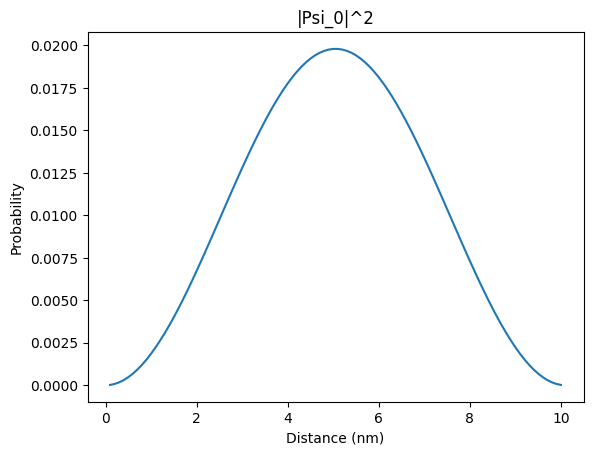

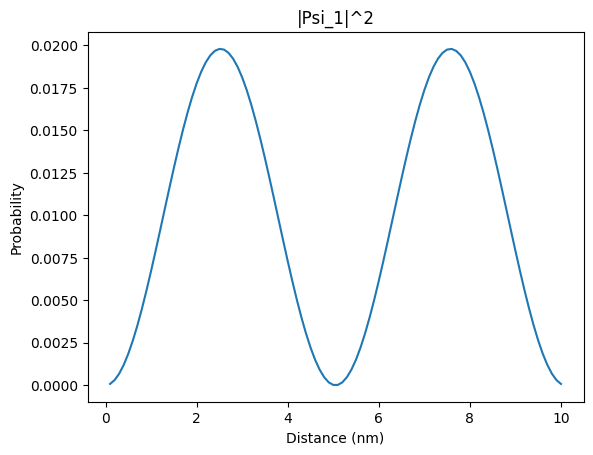

In [15]:
Psi0 = np.multiply(V[:, 0], V[:, 0])
Psi1 = np.multiply(V[:, 1], V[:, 1])

plt.figure(1)
plt.plot(X, U)
plt.xlabel('Distance (nm)')
plt.ylabel('Potential Energy (eV)')
plt.show()

plt.figure(2)
plt.plot(X, Psi0)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title('|Psi_0|^2')
plt.show()

plt.figure(3)
plt.plot(X, Psi1)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title('|Psi_1|^2')
plt.show()

i)
For the smallest energy level, the most probable position is between the two points $x_2$ and $x_1$ (one peak in the middle instead of 2 peaks) 

### Part D

In [16]:
F = 1
omega = 1 

## Discussion

## Conclusion